In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.compose import make_column_selector, make_column_transformer 

import warnings 
warnings.filterwarnings('ignore')

######## Evaluation Metrics ########
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    roc_curve,
    classification_report,
)
import time


In [109]:
df = pd.read_csv(r'Practical_Exam/card_transdata.csv')

# knowing data structure

In [110]:
df.head()

,Unnamed: 0,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0,17.719583,1.879432,0.389781,Yes,Yes,No,No,not_fraud
1,1,7.265702,2.445734,0.560661,Yes,Yes,No,No,not_fraud
2,2,2.500186,0.552497,4.547521,Yes,Yes,No,No,not_fraud
3,3,19.780661,0.202977,0.960433,Yes,No,No,No,not_fraud
4,4,4.108327,0.023426,0.388872,Yes,Yes,No,No,not_fraud


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000005 entries, 0 to 1000004
Data columns (total 9 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   Unnamed: 0                      1000005 non-null  int64  
 1   distance_from_home              1000004 non-null  float64
 2   distance_from_last_transaction  1000002 non-null  float64
 3   ratio_to_median_purchase_price  1000002 non-null  float64
 4   repeat_retailer                 1000002 non-null  object 
 5   used_chip                       1000002 non-null  object 
 6   used_pin_number                 1000002 non-null  object 
 7   online_order                    1000002 non-null  object 
 8   fraud                           1000002 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 68.7+ MB


In [112]:
df.drop(columns =['Unnamed: 0'],inplace= True)

In [113]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price
count,1.000004e+06,1.000002e+06,1.000002e+06
mean,2.662879e+01,5.036510e+00,1.824182e+00
std,6.539068e+01,2.584307e+01,2.799586e+00
min,-5.000000e+00,1.182816e-04,4.399240e-03
25%,3.877990e+00,2.966709e-01,4.756734e-01
50%,9.967760e+00,9.986473e-01,9.977227e-01
75%,2.574404e+01,3.355726e+00,2.096369e+00
max,1.063272e+04,1.185110e+04,2.678029e+02


In [114]:
df.isna().sum()

distance_from_home                1
distance_from_last_transaction    3
ratio_to_median_purchase_price    3
repeat_retailer                   3
used_chip                         3
used_pin_number                   3
online_order                      3
fraud                             3
dtype: int64

In [115]:
df.duplicated().sum()

3

# EDA

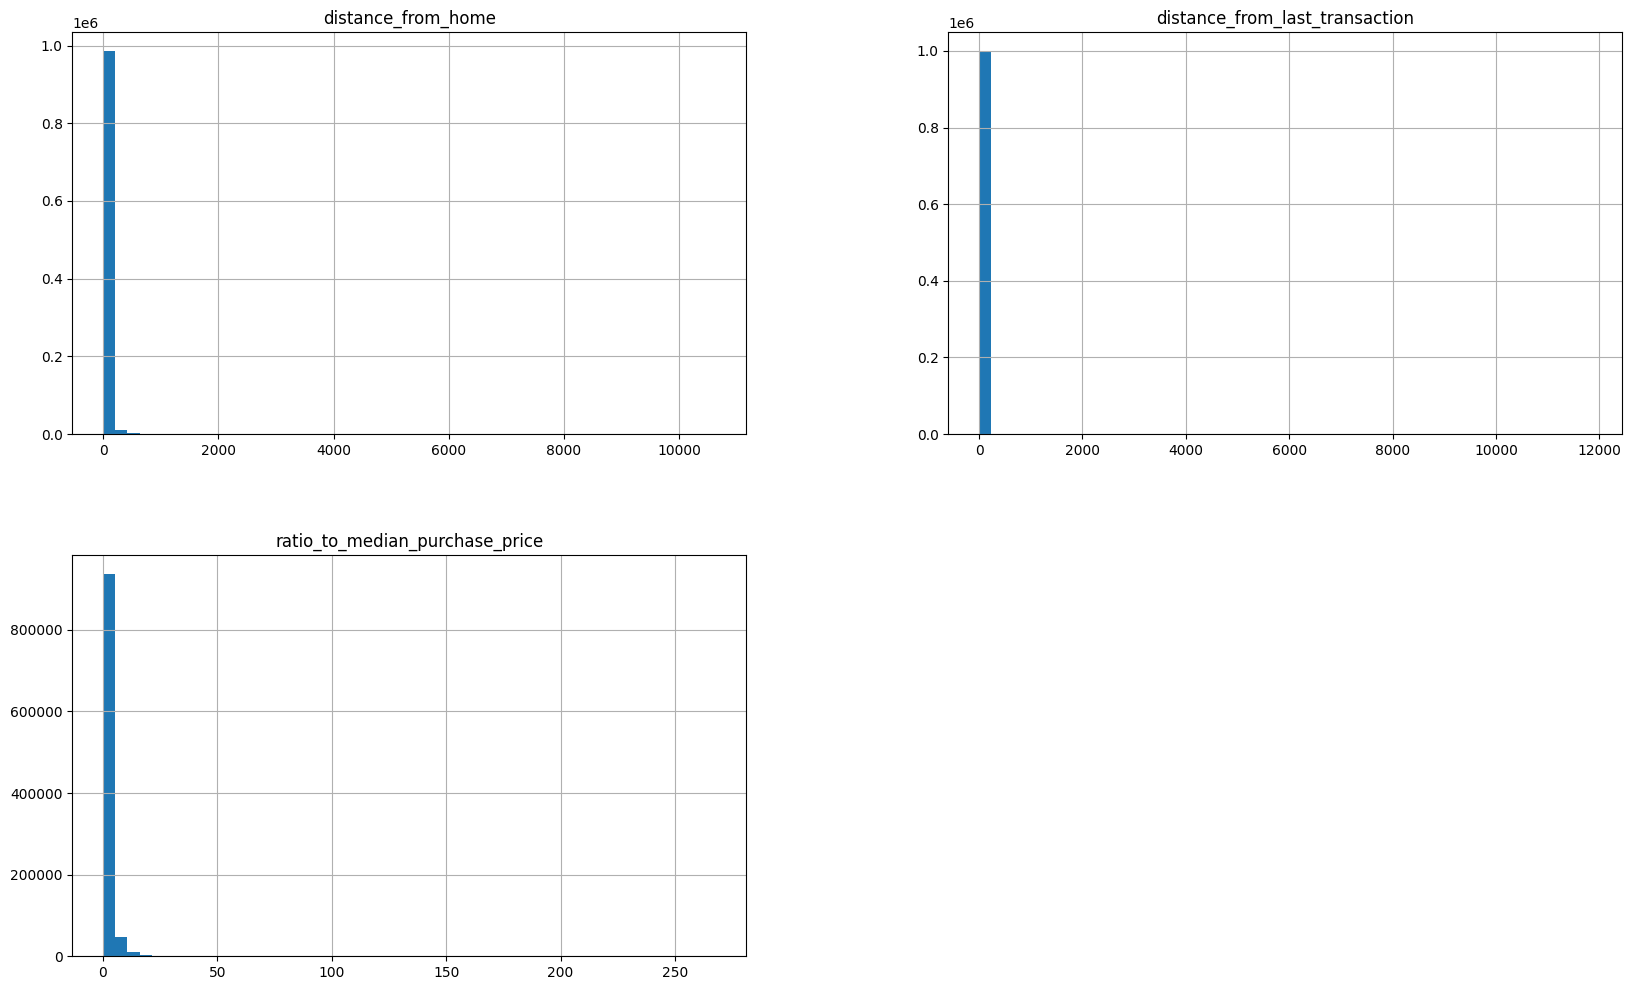

In [116]:
df.hist(bins= 50 , figsize= (20,12))
plt.show()

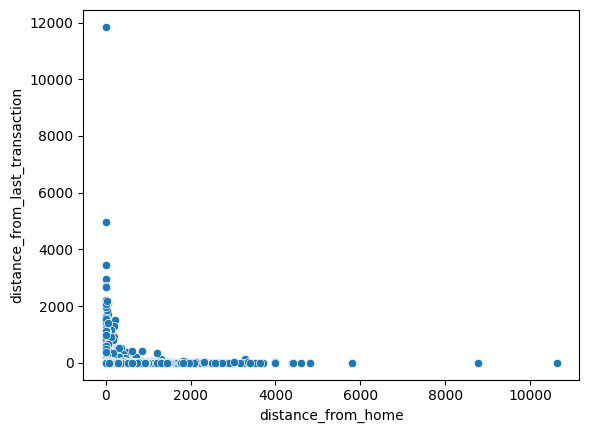

In [117]:
sns.scatterplot(data= df, x = 'distance_from_home',y= 'distance_from_last_transaction')
plt.show()

In [118]:
df2 = df.select_dtypes(include=np.number)

In [119]:
corr_matrix=df2.corr()
corr_matrix

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price
distance_from_home,1.000000,0.000193,-0.001374
distance_from_last_transaction,0.000193,1.000000,0.001013
ratio_to_median_purchase_price,-0.001374,0.001013,1.000000


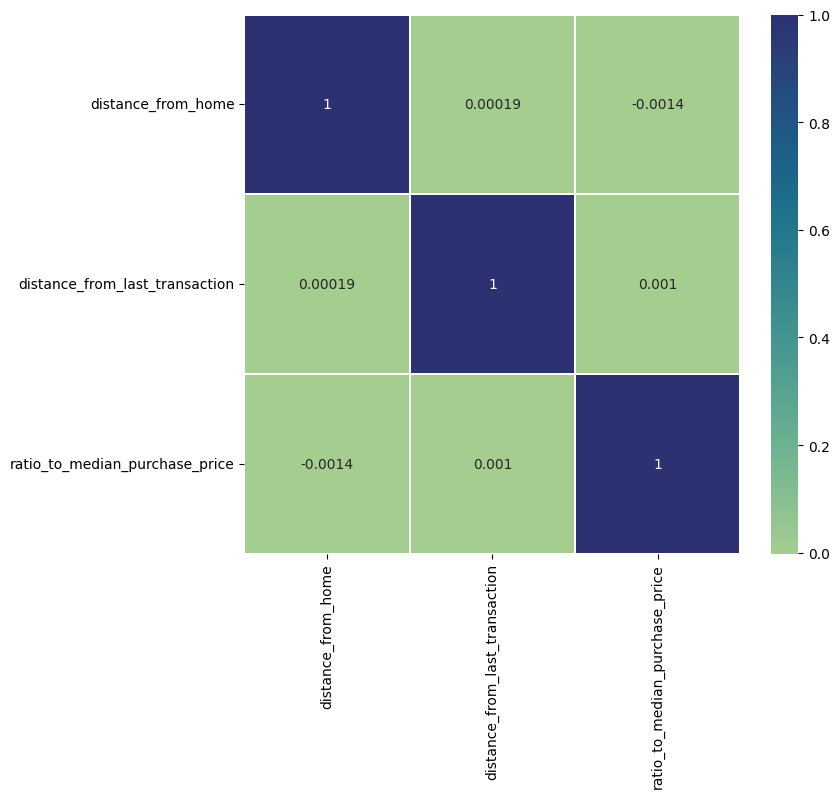

In [120]:
fig,ax = plt.subplots(1,1 , figsize =(8,7))
sns.heatmap(corr_matrix,annot= True, cmap = 'crest',linewidths=0.05,ax=ax)
plt.show()

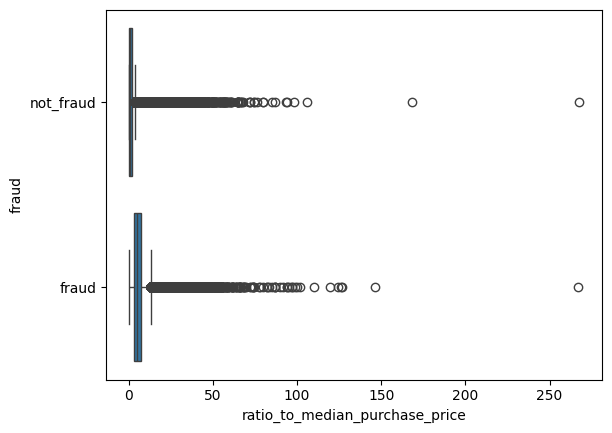

In [121]:
sns.boxplot(data=df ,x = 'ratio_to_median_purchase_price',y = 'fraud')
plt.show()

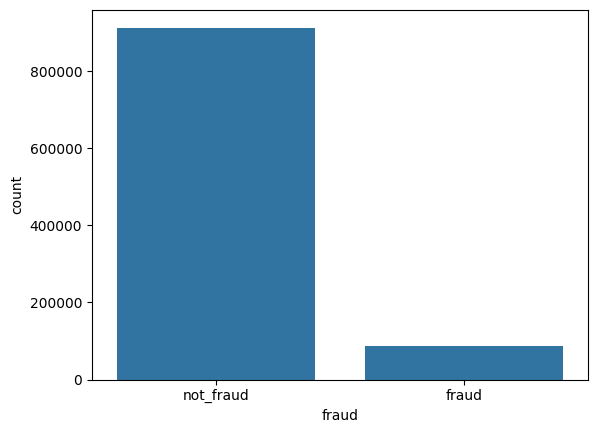

In [122]:
sns.countplot(data=df, x = 'fraud')
plt.show()

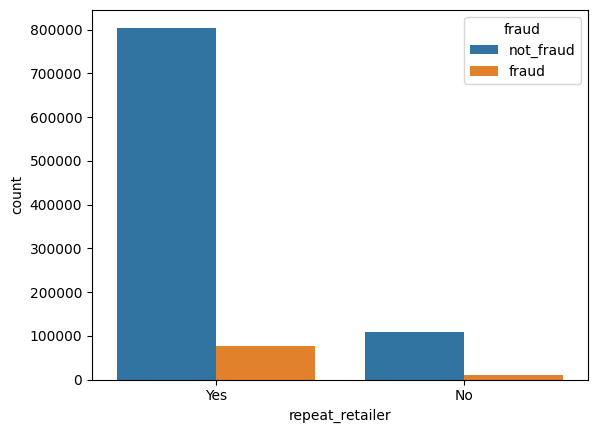

In [123]:
sns.countplot(data= df , x = 'repeat_retailer',hue= 'fraud')
plt.show()

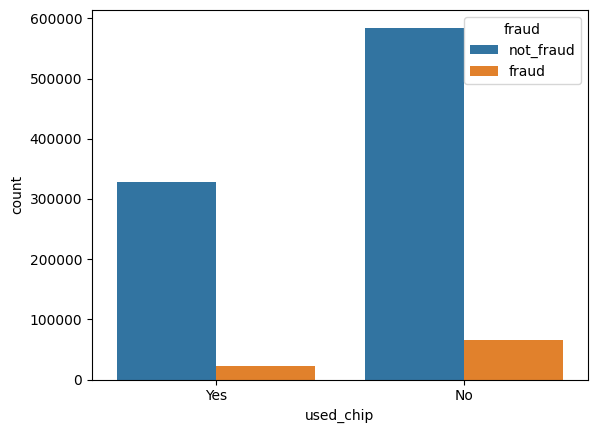

In [124]:
sns.countplot(data= df , x = 'used_chip',hue= 'fraud')
plt.show()

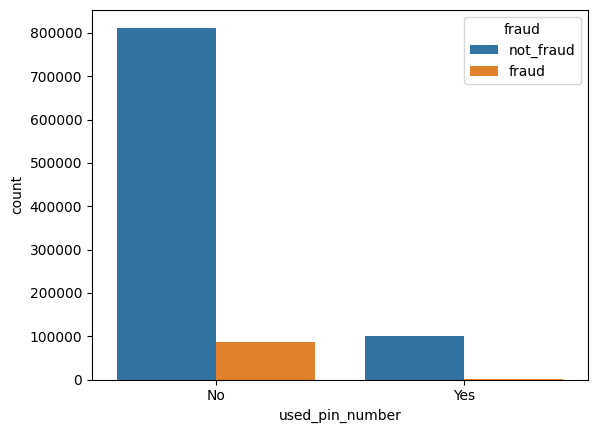

In [125]:
sns.countplot(data= df , x = 'used_pin_number',hue= 'fraud')
plt.show()

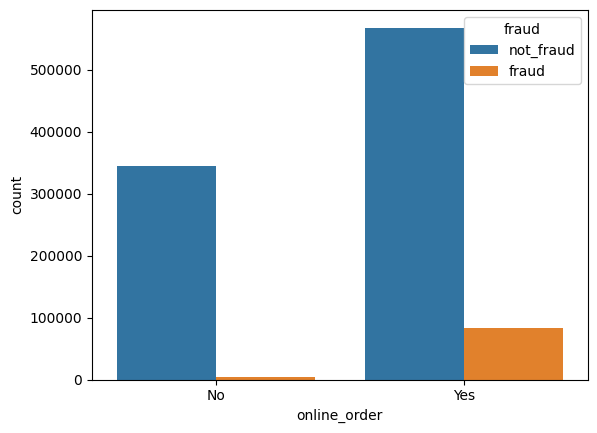

In [126]:
sns.countplot(data= df , x = 'online_order',hue= 'fraud')
plt.show()

In [127]:
def percetage_of_nan(df,col):
    num = df[col].isna().sum()
    tot = df.shape[0]
    return f"The percentage of NAN values in the {col} is {(num/tot)*100} %\n"

In [128]:
for i in df.columns:
    print(percetage_of_nan(df,i))

The percentage of NAN values in the distance_from_home is 9.999950000249998e-05 %

The percentage of NAN values in the distance_from_last_transaction is 0.00029999850000749997 %

The percentage of NAN values in the ratio_to_median_purchase_price is 0.00029999850000749997 %

The percentage of NAN values in the repeat_retailer is 0.00029999850000749997 %

The percentage of NAN values in the used_chip is 0.00029999850000749997 %

The percentage of NAN values in the used_pin_number is 0.00029999850000749997 %

The percentage of NAN values in the online_order is 0.00029999850000749997 %

The percentage of NAN values in the fraud is 0.00029999850000749997 %



In [129]:
for i in df.columns:
    df.dropna(subset= i, axis= 0,inplace=True)

In [130]:
for i in df.columns:
    print(percetage_of_nan(df,i))

The percentage of NAN values in the distance_from_home is 0.0 %

The percentage of NAN values in the distance_from_last_transaction is 0.0 %

The percentage of NAN values in the ratio_to_median_purchase_price is 0.0 %

The percentage of NAN values in the repeat_retailer is 0.0 %

The percentage of NAN values in the used_chip is 0.0 %

The percentage of NAN values in the used_pin_number is 0.0 %

The percentage of NAN values in the online_order is 0.0 %

The percentage of NAN values in the fraud is 0.0 %



In [131]:
df.duplicated().sum()

2

In [132]:
df.drop_duplicates(inplace=True)

In [133]:
df.shape

(1000000, 8)

# Prepare data for modeling 

In [134]:
not_fraud = df[df['fraud'] == 'not_fraud']
fraud= df[df['fraud'] == 'fraud']

In [135]:
not_fraud.shape

(912597, 8)

In [136]:
fraud.shape

(87403, 8)

In [137]:
df.groupby('fraud').agg({
    'distance_from_home': 'mean',
    'distance_from_last_transaction': 'mean',
    'ratio_to_median_purchase_price': 'mean'
})

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price
fraud,,,
fraud,66.261876,12.712185,6.006323
not_fraud,22.832976,4.301391,1.423642


In [138]:
# fraud shape is 87403
not_fraud_data = not_fraud.sample(n=87403)

In [139]:
not_fraud_data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
406241,7.942650,0.274517,5.121605,Yes,No,No,No,not_fraud
256465,29.810449,0.983804,3.658705,Yes,No,No,Yes,not_fraud
147196,4.859703,0.760835,2.631210,Yes,No,No,Yes,not_fraud
548668,23.238984,1.832205,7.322715,Yes,Yes,Yes,Yes,not_fraud
865699,17.646043,0.189177,0.964397,Yes,Yes,Yes,Yes,not_fraud
...,...,...,...,...,...,...,...,...
674996,2.123085,0.401859,1.173315,Yes,No,No,Yes,not_fraud
896398,192.380666,11.359612,0.698440,Yes,No,No,No,not_fraud
676011,9.030661,7.356844,0.806791,Yes,No,No,No,not_fraud
695094,6.038959,11.237940,0.824920,Yes,Yes,No,Yes,not_fraud


In [140]:
final_data = pd.concat([not_fraud_data, fraud], axis=0)

In [141]:
final_data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
406241,7.942650,0.274517,5.121605,Yes,No,No,No,not_fraud
256465,29.810449,0.983804,3.658705,Yes,No,No,Yes,not_fraud
147196,4.859703,0.760835,2.631210,Yes,No,No,Yes,not_fraud
548668,23.238984,1.832205,7.322715,Yes,Yes,Yes,Yes,not_fraud
865699,17.646043,0.189177,0.964397,Yes,Yes,Yes,Yes,not_fraud
...,...,...,...,...,...,...,...,...
999941,270.488016,0.824420,1.208655,Yes,No,No,Yes,fraud
999945,0.553892,0.074159,15.841654,No,No,No,No,fraud
999949,39.804632,0.662153,5.880623,Yes,No,No,Yes,fraud
999963,15.516135,1.308100,10.735399,Yes,No,No,Yes,fraud


In [142]:
final_data.to_csv(r"Practical_Exam/final_data.csv")

In [143]:
final_data.groupby('fraud').agg({
    'distance_from_home': 'mean',
    'distance_from_last_transaction': 'mean',
    'ratio_to_median_purchase_price': 'mean'
})

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price
fraud,,,
fraud,66.261876,12.712185,6.006323
not_fraud,22.844624,4.355842,1.421366


In [144]:
final_data['fraud'].value_counts()

fraud
not_fraud    87403
fraud        87403
Name: count, dtype: int64

In [145]:
x = final_data.drop('fraud', axis=1)
y = final_data['fraud']

In [146]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [147]:
print(x_train.shape, x_test.shape, x.shape)

(139844, 7) (34962, 7) (174806, 7)


In [148]:
#ss = StandardScaler()
#x_train_scaled = ss.fit_transform(x_train)

In [149]:
#le = LabelEncoder()
#y_train_encoded = le.fit_transform(y_train)

In [150]:
#x_test_scaled = ss.transform(x_test)
#y_test_encoded = le.transform(y_test)

In [151]:
num_featues = x_train.select_dtypes(include=np.number)
num_attributes = list(num_featues)
num_attributes

['distance_from_home',
 'distance_from_last_transaction',
 'ratio_to_median_purchase_price']

In [152]:
cat_featues = x_train.select_dtypes(include='object')
cat_attribures=list(cat_featues)
cat_attribures

['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']

In [153]:
num_pipeline = Pipeline([
    ("std_scaler",StandardScaler())
])
cat_pipeline = Pipeline([
    ("onehot_encoder", OneHotEncoder(handle_unknown='ignore'))
])

In [154]:
#preprocessing = ColumnTransformer([
#    ("num",num_pipeline,num_attributes),
#    ('cat',cat_pipeline,cat_attribures)
#])

In [155]:
preprocessing =  make_column_transformer(
    (num_pipeline,
     make_column_selector(dtype_include=np.number)),
     (cat_pipeline,
      make_column_selector(dtype_include=object))
)

In [156]:
x_train_scaled = preprocessing.fit_transform(x_train)
x_train_scaled.shape

(139844, 11)

In [157]:
le  = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

In [158]:
x_test_scaled = preprocessing.transform(x_test)
y_test_encoded = le.transform(y_test)

## Now we go with the model

#### Logistic Regression

In [159]:
train_accuracy = []
test_accuracy = []
precision = []
recall = []
f1 = []

def calculate_acc(true, pred):
    precision.append(precision_score(true, pred))
    recall.append(recall_score(true, pred))
    f1.append(f1_score(true, pred))
    

In [160]:
lr = LogisticRegression()
lr.fit(x_train_scaled, y_train_encoded)
lr_pred = lr.predict(x_test_scaled)

In [161]:
accuracy_score(y_test_encoded, lr_pred)

0.9396201590298038

In [162]:
lr_cv = cross_val_score(lr, x_train_scaled, y_train_encoded, cv=5, scoring='accuracy')
lr_score = lr_cv.mean()
train_accuracy.append(lr_score)
test_accuracy.append(accuracy_score(y_test_encoded, lr_pred))

In [163]:
calculate_acc(y_test_encoded, lr_pred)

<Axes: >

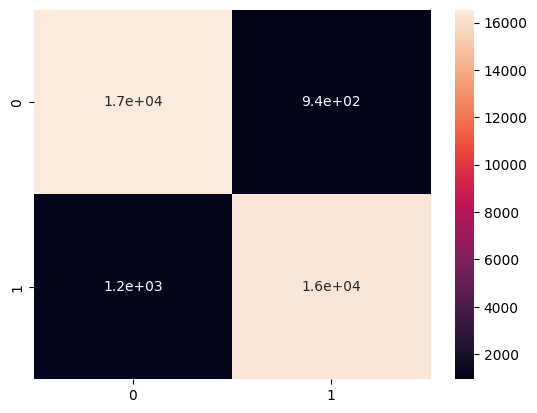

In [164]:
cm_lr = confusion_matrix(y_test_encoded, lr_pred)
sns.heatmap(cm_lr, annot=True)

#### Decision Tree

In [165]:
dt = DecisionTreeClassifier()

params = {
    'max_depth': [5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50]
}

dt_grid = GridSearchCV(dt, param_grid=params, 
                        cv=3, n_jobs=-1, verbose=1, scoring = "accuracy")
dt_grid.fit(x_train_scaled, y_train_encoded)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50]},
             scoring='accuracy', verbose=1)

In [166]:
dt_clf = dt_grid.best_estimator_
dt_clf

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5)

In [167]:
dt_pred = dt_clf.predict(x_test_scaled)

test_acc = accuracy_score(y_test_encoded, dt_pred)
train_acc = accuracy_score(y_train_encoded, dt_clf.predict(x_train_scaled))
test_acc, train_acc

(0.999942795034609, 0.9999356425731529)

In [168]:
train_accuracy.append(train_acc)
test_accuracy.append(test_acc)
calculate_acc(y_test_encoded, dt_pred)

<Axes: >

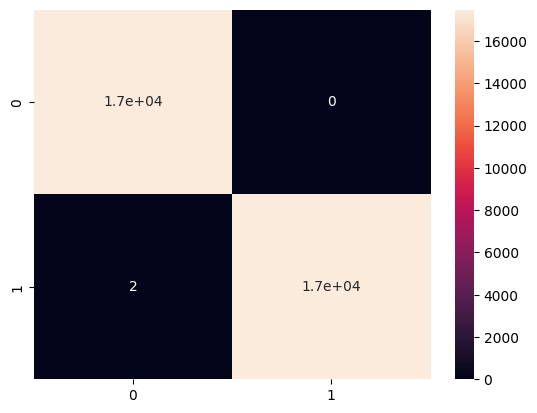

In [169]:
cm_dt = confusion_matrix(y_test_encoded, dt_pred)
sns.heatmap(cm_dt, annot = True)

#### Random Forest

In [170]:
rfc = RandomForestClassifier()

parameters = { 
    'n_estimators': [50, 100, 150], 
     
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
} 

rfc_grid = GridSearchCV(rfc, param_grid=parameters, cv=3)

rfc_grid.fit(x_train_scaled, y_train_encoded)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 6, 9], 'max_leaf_nodes': [3, 6, 9],
                         'n_estimators': [50, 100, 150]})

In [171]:
rfc_grid.best_params_

{'max_depth': 9, 'max_leaf_nodes': 9, 'n_estimators': 150}

In [172]:
rfc_clf = RandomForestClassifier(max_depth=9, max_leaf_nodes=9, n_estimators=150, max_features='sqrt')
rfc_clf.fit(x_train_scaled, y_train_encoded)

rfc_pred = rfc_clf.predict(x_test_scaled)

In [173]:
test_acc = accuracy_score(y_test_encoded, rfc_pred)
train_acc = accuracy_score(y_train_encoded, rfc_clf.predict(x_train_scaled))
test_acc, train_acc

(0.9941078885647274, 0.993685821343783)

In [174]:
train_accuracy.append(train_acc)
test_accuracy.append(test_acc)

In [175]:
calculate_acc(y_test_encoded, rfc_pred)

<Axes: >

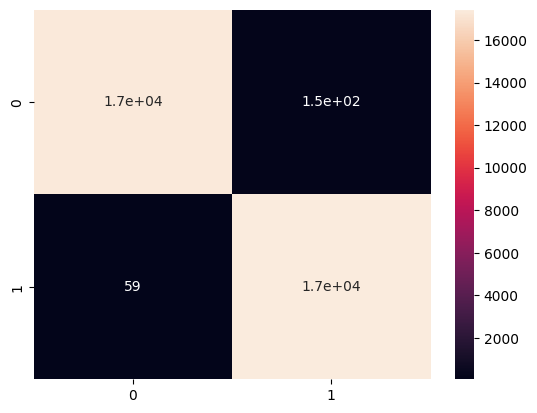

In [176]:
cm_rfc = confusion_matrix(y_test_encoded, rfc_pred)
sns.heatmap(cm_rfc, annot=True)

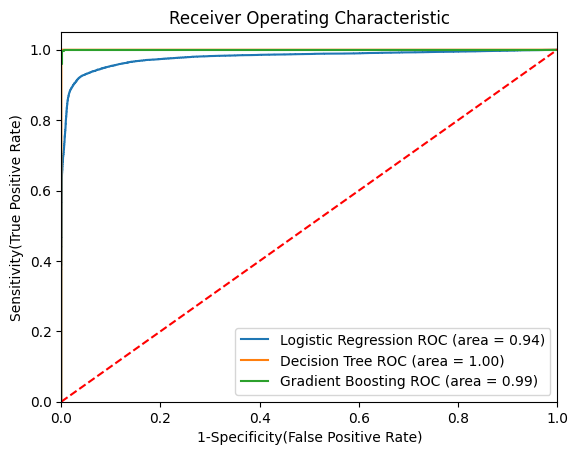

In [177]:
plt.figure()

models = [
{
    'label': 'Logistic Regression',
    'model': lr,
},
{
     'label' : 'Decision Tree',
     'model' : dt_clf
},
{
    'label': 'Gradient Boosting',
    'model': rfc_clf,
}
]

for m in models:
    model = m['model']
    model.fit(x_train_scaled, y_train_encoded)
    y_pred=model.predict(x_test_scaled)
    
    fpr, tpr, thresholds = roc_curve(y_test_encoded, model.predict_proba(x_test_scaled)[:,1])
    auc = roc_auc_score(y_test_encoded,model.predict(x_test_scaled))
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
    
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   

In [178]:
models = ['Logistic Regression','Decision Tree', 'Random Forest']
model_df = pd.DataFrame(index=models, columns=['precision', 'recall', 'f1-score', 'train_accuracy', 'test_accuracy'])
model_df['precision'] = precision
model_df['recall'] = recall
model_df['f1-score'] = f1
model_df['train_accuracy'] = train_accuracy
model_df['test_accuracy'] = test_accuracy

In [179]:
model_df

,precision,recall,f1-score,train_accuracy,test_accuracy
Logistic Regression,0.945766,0.932727,0.939201,0.939926,0.939620
Decision Tree,1.000000,0.999886,0.999943,0.999936,0.999943
Random Forest,0.991633,0.996625,0.994123,0.993686,0.994108


In [180]:
import joblib

In [182]:
joblib.dump(rfc_clf,"model.pkl")

['model.pkl']

In [183]:
joblib.dump(preprocessing,"pipeline.pkl")

['pipeline.pkl']